In [22]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_selection import VarianceThreshold

In [5]:
df = pd.read_csv('739to4000_with_tags,KL_divergence,FinRatios.csv')
df.head()

,adsh,fraud,ddate,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
0,0000002178-18-000009,0.0,20161231.0,106756000.0,7.875000e+07,6504000.0,1.114280e+08,2.210870e+08,2.163510e+09,0.0,...,0.539227,6.440080e+08,0.229387,26.298456,13.879142,0.038025,1.139030e+09,0.000000,0.316076,0.559690
1,0000002488-18-000042,0.0,20161231.0,126000000.0,2.010000e+09,90000000.0,3.825000e+09,9.210000e+08,6.611000e+09,948000000.0,...,1.464384,3.287000e+09,0.332087,78.555556,4.646393,0.012730,2.617100e+10,0.036223,0.261277,0.122158
2,0000002969-18-000014,0.0,20161231.0,-57400000.0,5.735000e+08,525400000.0,1.040000e+07,2.061000e+08,1.587700e+09,0.0,...,0.003057,2.948000e+08,0.156600,-32.796167,-11.129349,-0.030491,1.062500e+09,0.000000,0.320778,-0.217035
3,0000003499-18-000006,0.0,20161231.0,182581000.0,8.456940e+08,130820000.0,1.110608e+09,1.655981e+09,3.176400e+08,0.0,...,0.822055,1.179930e+08,0.270854,2.385971,152.977541,0.419117,5.371457e+09,0.000000,0.367267,-0.002388
4,0000003545-18-000021,0.0,20161231.0,7177000.0,-6.183000e+06,-16890000.0,-4.823000e+06,3.916000e+06,3.149000e+06,0.0,...,2.353128,2.942400e+07,0.903325,4.538526,80.422589,0.220336,7.572000e+06,0.000000,0.370623,6.116482


In [6]:
target = df.fraud

In [7]:
df = df.drop(['adsh','ddate','fraud'], axis=1)
df.head()

,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,OtherCurrentAssets,OtherIncome,OtherLiabilities,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
0,106756000.0,7.875000e+07,6504000.0,1.114280e+08,2.210870e+08,2.163510e+09,0.0,4.751370e+08,4.700000e+06,1.910170e+08,...,0.539227,6.440080e+08,0.229387,26.298456,13.879142,0.038025,1.139030e+09,0.000000,0.316076,0.559690
1,126000000.0,2.010000e+09,90000000.0,3.825000e+09,9.210000e+08,6.611000e+09,948000000.0,2.048300e+10,1.559000e+09,4.727000e+09,...,1.464384,3.287000e+09,0.332087,78.555556,4.646393,0.012730,2.617100e+10,0.036223,0.261277,0.122158
2,-57400000.0,5.735000e+08,525400000.0,1.040000e+07,2.061000e+08,1.587700e+09,0.0,1.100000e+08,-7.588000e+08,1.440000e+07,...,0.003057,2.948000e+08,0.156600,-32.796167,-11.129349,-0.030491,1.062500e+09,0.000000,0.320778,-0.217035
3,182581000.0,8.456940e+08,130820000.0,1.110608e+09,1.655981e+09,3.176400e+08,0.0,1.490230e+09,0.000000e+00,1.104726e+09,...,0.822055,1.179930e+08,0.270854,2.385971,152.977541,0.419117,5.371457e+09,0.000000,0.367267,-0.002388
4,7177000.0,-6.183000e+06,-16890000.0,-4.823000e+06,3.916000e+06,3.149000e+06,0.0,-7.200000e+04,2.194500e+07,-1.121000e+06,...,2.353128,2.942400e+07,0.903325,4.538526,80.422589,0.220336,7.572000e+06,0.000000,0.370623,6.116482


In [8]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaled_df.head()

,AccountsReceivable,Cash,CashFlowfromOps,CurrentLiabilities,Depreciation,Expenses,IntangibleAssets,OtherCurrentAssets,OtherIncome,OtherLiabilities,...,DebtToEquityRatio,NetIncome,ProfitMargin,ReceivableTurnover,CollectionRatio,DSRI,TotalAssets,AQI,DEPI,TATA
0,-0.049149,-0.047866,-0.188882,-0.115455,-0.133843,-0.093800,-0.15116,-0.077214,-0.066630,-0.073339,...,-0.013332,0.043272,0.027361,-0.015921,-0.020880,-0.020880,-0.091132,-0.225344,0.271118,0.043936
1,-0.049063,0.039445,-0.155622,0.110438,-0.053649,0.001734,-0.09378,-0.030408,-0.040274,-0.060752,...,-0.013332,0.109684,0.027402,0.026730,-0.020881,-0.020881,-0.049329,-0.124785,0.171077,-0.007698
2,-0.049886,-0.025498,0.017818,-0.121601,-0.135561,-0.106169,-0.15116,-0.078068,-0.079576,-0.073830,...,-0.013332,0.034498,0.027331,-0.064152,-0.020882,-0.020882,-0.091260,-0.225344,0.279702,-0.047727
3,-0.048809,-0.013192,-0.139362,-0.054676,0.030564,-0.133451,-0.15116,-0.074839,-0.066710,-0.070804,...,-0.013332,0.030055,0.027377,-0.035438,-0.020870,-0.020870,-0.084064,-0.225344,0.364571,-0.022396
4,-0.049596,-0.051705,-0.198201,-0.122527,-0.158726,-0.140206,-0.15116,-0.078325,-0.066337,-0.073873,...,-0.013332,0.027830,0.027631,-0.033681,-0.020875,-0.020875,-0.093022,-0.225344,0.370698,0.699700


In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.25)

In [44]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=10,
                                    max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=5, 
                                     n_estimators=100, subsample=0.7500000000000001)

In [47]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [45]:
gbt_clf.fit(X_train.as_matrix(), y_train.as_matrix())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=0.35000000000000003, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.7500000000000001, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [49]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')


Training Metrics
Model: AdaBoost
Accuracy: 0.9320477502295684
F1-Score: 0.690376569037657

Model: Gradient Boosted Trees
Accuracy: 1.0
F1-Score: 1.0

Testing Metrics
Model: AdaBoost
Accuracy: 0.9146005509641874
F1-Score: 0.6196319018404909

Model: Gradient Boosted Trees
Accuracy: 0.9634986225895317
F1-Score: 0.8539944903581267


In [50]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[1227,   31],
       [  93,  101]])

In [51]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[1244,   14],
       [  39,  155]])

In [52]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      1258
         1.0       0.77      0.52      0.62       194

   micro avg       0.91      0.91      0.91      1452
   macro avg       0.85      0.75      0.79      1452
weighted avg       0.91      0.91      0.91      1452



In [53]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1258
         1.0       0.92      0.80      0.85       194

   micro avg       0.96      0.96      0.96      1452
   macro avg       0.94      0.89      0.92      1452
weighted avg       0.96      0.96      0.96      1452



In [54]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, scaled_df, target, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.903926642530714


In [55]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, scaled_df, target, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.9196014600273014


# With Variance Threshold

In [79]:
selector = VarianceThreshold(threshold=.005)
VT = selector.fit_transform(scaled_df)
features = df.columns
X = pd.DataFrame(data = VT, columns = features)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25)

In [82]:
gbt_clf = GradientBoostingClassifier(learning_rate=0.1, max_depth=10,
                                    max_features=0.35000000000000003, min_samples_leaf=10, min_samples_split=5, 
                                     n_estimators=100, subsample=0.7500000000000001)

In [83]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=0.35000000000000003, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=5,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.7500000000000001, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [85]:
print("Training Metrics")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("Testing Metrics")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')


Training Metrics
Model: Gradient Boosted Trees
Accuracy: 0.9997704315886135
F1-Score: 0.9991158267020336
Testing Metrics
Model: Gradient Boosted Trees
Accuracy: 0.9573002754820936
F1-Score: 0.8121212121212121


In [86]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[1256,   22],
       [  40,  134]])

In [87]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1278
         1.0       0.86      0.77      0.81       174

   micro avg       0.96      0.96      0.96      1452
   macro avg       0.91      0.88      0.89      1452
weighted avg       0.96      0.96      0.96      1452



In [88]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, scaled_df, target, cv=5).mean())

Mean GBT Cross-Val Score (k=5):
0.9223556294142086


In [89]:
gbt_clf.feature_importances_

array([3.06067220e-02, 1.70830128e-02, 3.80745017e-02, 4.09621591e-02,
       4.87516457e-02, 1.02567131e-01, 2.31726007e-02, 4.29100041e-02,
       2.65361244e-02, 1.76752841e-02, 5.25838007e-02, 1.91916722e-02,
       3.98711470e-02, 1.68520163e-01, 7.63869153e-02, 3.73747237e-02,
       7.91978658e-05, 2.01333853e-02, 0.00000000e+00, 1.81775758e-02,
       2.04517444e-02, 6.14399320e-03, 8.32607444e-03, 8.35916475e-03,
       2.66735538e-02, 3.27440794e-02, 3.53161276e-02, 4.13274954e-02])

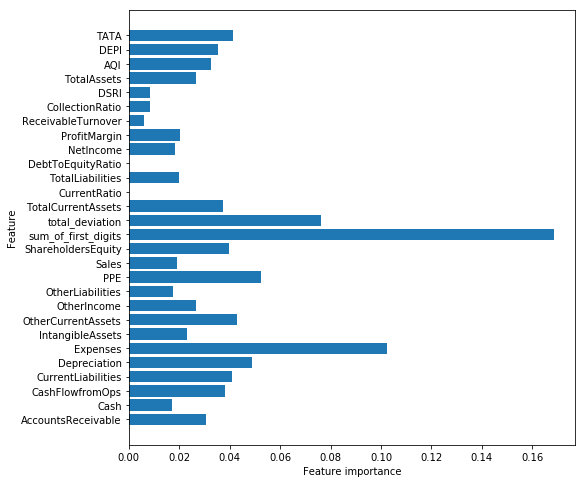

In [90]:
import matplotlib.pyplot as plt

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), gbt_clf.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(gbt_clf)

AUC: 0.9833702084794849


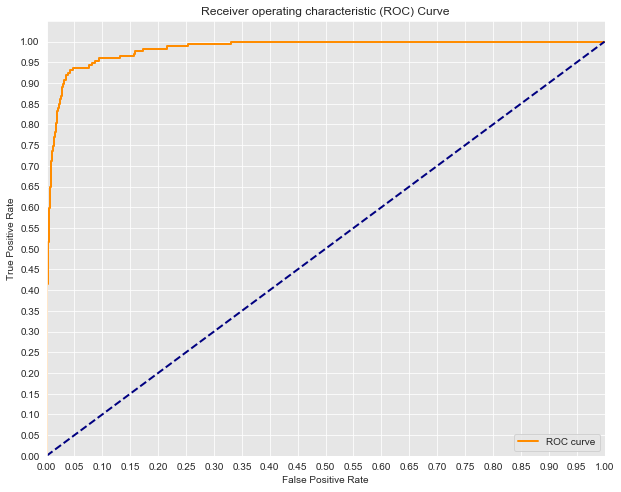

In [97]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
#Probability scores for test set
y_score = gbt_clf.fit(X_train, y_train).decision_function(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [98]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.82472613e-04,
       7.82472613e-04, 7.82472613e-04, 7.82472613e-04, 1.56494523e-03,
       1.56494523e-03, 2.34741784e-03, 2.34741784e-03, 3.12989045e-03,
       3.12989045e-03, 3.91236307e-03, 3.91236307e-03, 3.91236307e-03,
       3.91236307e-03, 6.25978091e-03, 6.25978091e-03, 7.82472613e-03,
       7.82472613e-03, 8.60719875e-03, 8.60719875e-03, 9.38967136e-03,
       9.38967136e-03, 1.01721440e-02, 1.01721440e-02, 1.09546166e-02,
       1.09546166e-02, 1.17370892e-02, 1.17370892e-02, 1.25195618e-02,
       1.25195618e-02, 1.33020344e-02, 1.33020344e-02, 1.40845070e-02,
       1.40845070e-02, 1.56494523e-02, 1.56494523e-02, 1.64319249e-02,
       1.64319249e-02, 1.72143975e-02, 1.72143975e-02, 1.95618153e-02,
       1.95618153e-02, 2.11267606e-02, 2.11267606e-02, 2.26917058e-02,
       2.26917058e-02, 2.34741784e-02, 2.34741784e-02, 2.42566510e-02,
       2.42566510e-02, 2.58215962e-02, 2.58215962e-02, 2.73865415e-02,
      